In [59]:
from astropy.convolution import interpolate_replace_nans, Gaussian2DKernel
from scipy import ndimage
from astropy.io import fits
import scipy.ndimage
%matplotlib inline
import pylab as pl
pl.rcParams['figure.facecolor'] = 'w'
pl.rcParams['image.origin'] = 'lower'
pl.rcParams['figure.figsize'] = (10,8)
from astropy.io import fits
import reproject
from astropy import convolution
from astropy.convolution import Gaussian2DKernel
from astropy import units as u
from astropy.table import Table
import pyavm
import regions
from astropy import coordinates
import PIL
#from spectral_cube import SpectralCube, Projection, Slice
from astropy import wcs
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv, hsv_to_rgb
import numpy as np
from astropy.visualization import simple_norm
import glob
import warnings
import regions
from tqdm.notebook import tqdm

In [2]:
#result = interpolate_replace_nans(image, kernel)

In [4]:
basepath = '/orange/adamginsburg/jwst/cloudc/'

In [35]:
file = f"{basepath}//images/jw02221-o002_t001_nircam_clear-f410m-merged-nodestreak_i2d.fits"
img = fits.getdata(file, ext=1)
img[img==0] = np.nan
header = fits.getheader(file, ext=1)
ww = wcs.WCS(header)
img.shape

(2466, 8003)

In [14]:
pixel_scale = np.sqrt(fits.getheader(file, ext=1)['PIXAR_A2']*u.arcsec**2)/u.pix
pixel_scale

<Quantity 0.06295367 arcsec / pix>

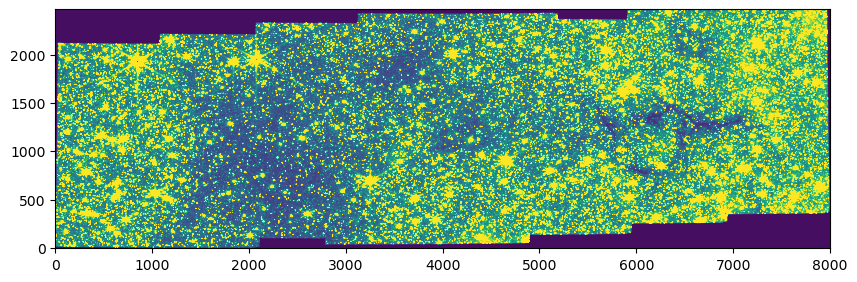

In [7]:
pl.imshow(img, vmin=-1, vmax=25)

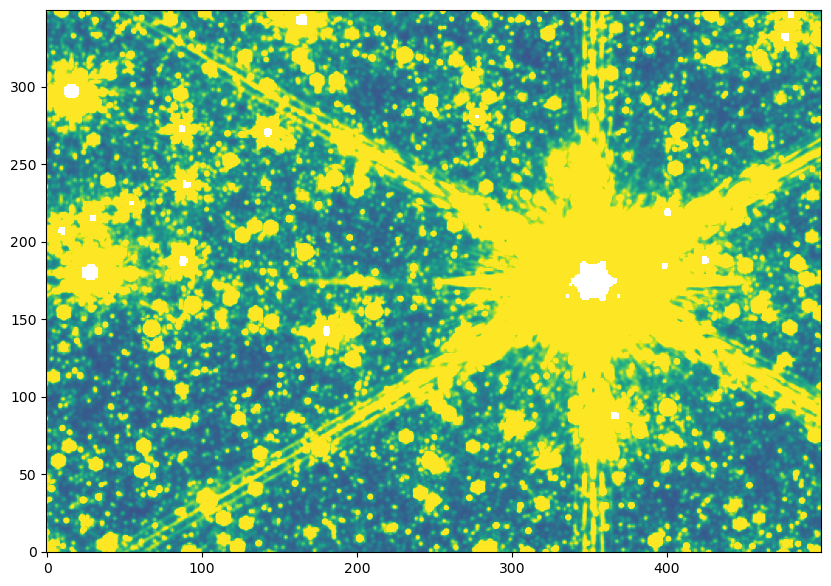

In [44]:
pl.imshow(img[1750:2100,500:1000], vmin=-1, vmax=25)

In [49]:
kernal64 = Gaussian2DKernel(64)
kernal32 = Gaussian2DKernel(32)
kernal16 = Gaussian2DKernel(16)

In [37]:
2*u.arcsec / pixel_scale

<Quantity 31.76939717 pix>

In [45]:
inter64 = interpolate_replace_nans(array=img[1750:2100,500:1000], kernel=kernal64)

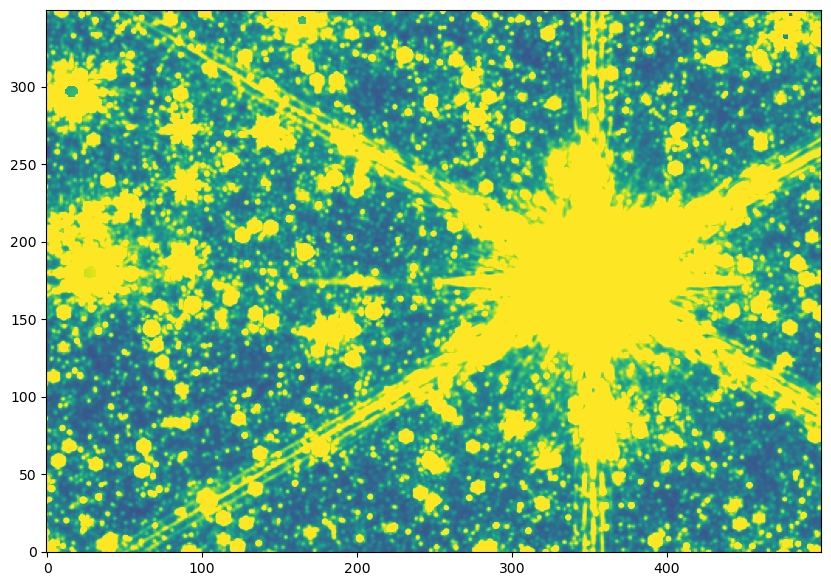

In [46]:
pl.imshow(inter64, vmin=-1, vmax=25)

In [53]:
inter32 = interpolate_replace_nans(array=img[1750:2100,500:1000], kernel=kernal32)

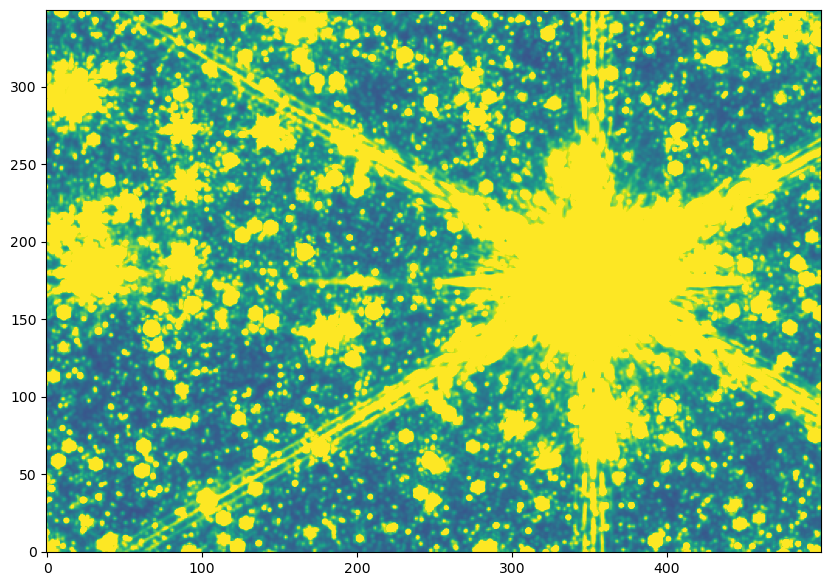

In [54]:
pl.imshow(inter32, vmin=-1, vmax=25)

In [55]:
inter16 = interpolate_replace_nans(array=img[1750:2100,500:1000], kernel=kernal16)

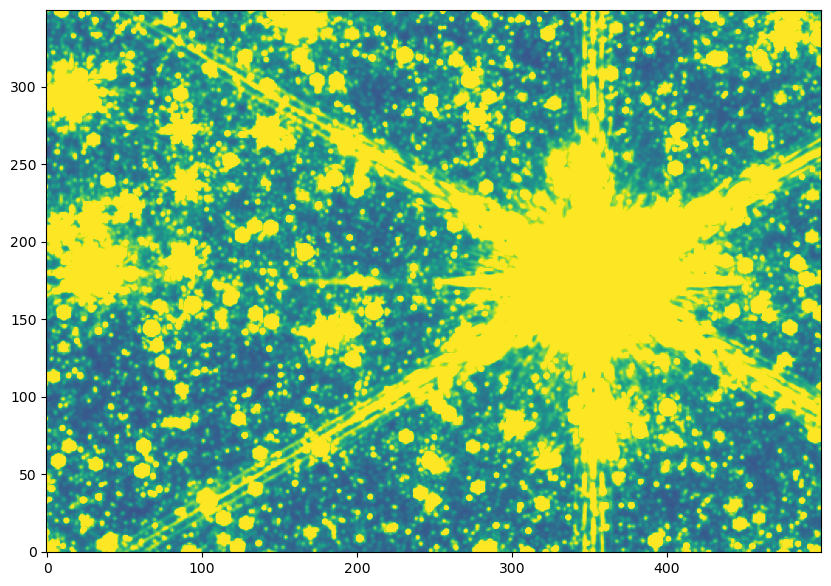

In [56]:
pl.imshow(inter16, vmin=-1, vmax=25)

In [57]:
inter16_whole = interpolate_replace_nans(array=img, kernel=kernal16)

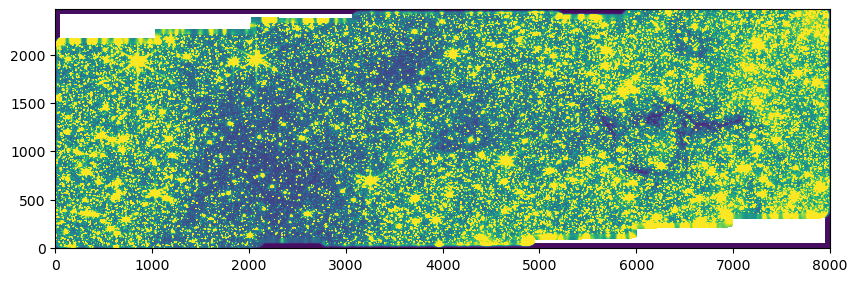

In [58]:
pl.imshow(inter16_whole, vmin=-1, vmax=25)

In [62]:
fn = glob.glob(f'{basepath}/images/jw02221-o002_t001_nircam_*{filtername.lower()}*nodestreak_i2d.fits')
fn

['/orange/adamginsburg/jwst/cloudc//images/jw02221-o002_t001_nircam_clear-f405n-merged-nodestreak_i2d.fits']

In [65]:
dx=64
fn[0].replace("_i2d.fits", f"_i2d-percfilt{dx}.fits")

'/orange/adamginsburg/jwst/cloudc//images/jw02221-o002_t001_nircam_clear-f405n-merged-nodestreak_i2d-percfilt64.fits'